<a href="https://colab.research.google.com/github/rubychen4186/Canny_Detection/blob/main/hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

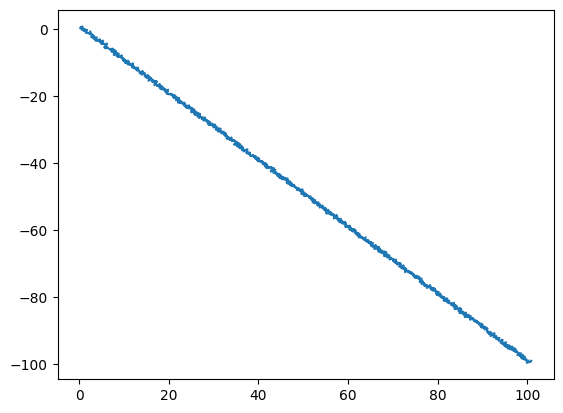

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

#sample some points for a line
xs = np.zeros(1000)
ys = np.zeros(1000)

for i in range(1000):
  xs[i] = i*0.1
  ys[i] = -i*0.1

#adding noise
xs += np.random.rand(1000)
ys += np.random.rand(1000)
# plot
fig, ax = plt.subplots()

ax.plot(xs, ys)

plt.show()

In [ ]:
from itertools import accumulate
def hough_transform(x, y):
  # x*cos(theta)+y*sin(theta)=rho
  #initial the parameters for theta and rho
  theta = np.arange(-np.pi/2, np.pi/2, np.pi/180.0)
  #assume our data range is from -10 to 210
  rho = np.arange(-150, 150, 5)

  num_theta = len(theta)
  num_rho = len(rho)

  accumulate = np.zeros((num_rho, num_theta))

  # Vote in the hough
  for x,y in zip(xs,ys):
    for t in range(num_theta):
      A = x * np.cos(theta[t])
      B = y * np.sin(theta[t])

      current_rho = A + B
      #find the closest rho and increse by 1
      rho_pos = np.argmin(np.abs(current_rho - rho))
      #rho_pos = np.where(current_rho>rho)[0][-1]
      #print(rho_pos)
      accumulate[rho_pos, t] += 1

  # Take the polar coordinates most matched
  threshold = 800
  final_rho_index, final_theta_index = np.where(accumulate > threshold)
  final_rho = rho[final_rho_index]
  final_theta = theta[final_theta_index]
  print(final_rho, final_theta )
  return final_rho, final_theta

In [ ]:
rhos, thetas = hough_transform(x, y)


[0 0] [0.78539816 0.80285146]


In [ ]:
def show_hough_line(rhos, thetas):

    for i in range(len(rhos)):

      x0 = rhos[i]*np.cos(thetas[i])
      y0 = rhos[i]*np.sin(thetas[i])

      x1 = x0 + np.sin(thetas[i])
      y1 = y0 - np.cos(thetas[i])

      plt.plot([x0, x1], [y0, y1], marker = 'o')

    plt.show()


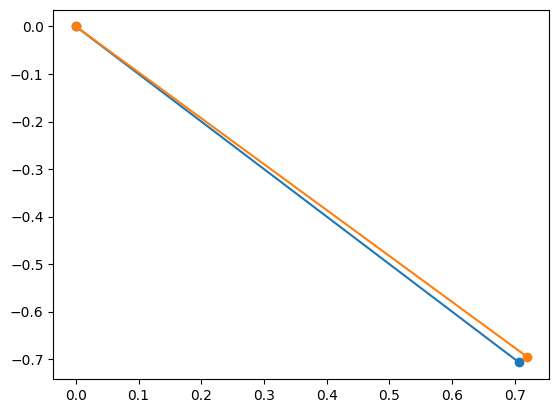

In [ ]:
show_hough_line(rhos, thetas)